In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("/Users/weiyushitian/Documents/dsga 1018 time series/proj/archive/time_series_data_human_activities.csv")

In [4]:
data.head()

,user,activity,timestamp,x-axis,y-axis,z-axis
0,1,Walking,4991922345000,0.69,10.80,-2.03
1,1,Walking,4991972333000,6.85,7.44,-0.50
2,1,Walking,4992022351000,0.93,5.63,-0.50
3,1,Walking,4992072339000,-2.11,5.01,-0.69
4,1,Walking,4992122358000,-4.59,4.29,-1.95


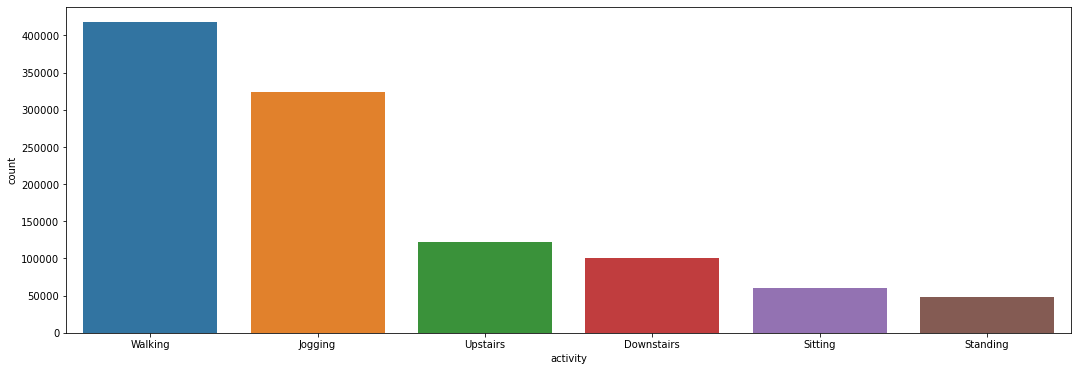

In [13]:
#count of time stamps of each activity
plt.figure(figsize = (18, 6))
sns.countplot(x = "activity", data = data)
plt.show()

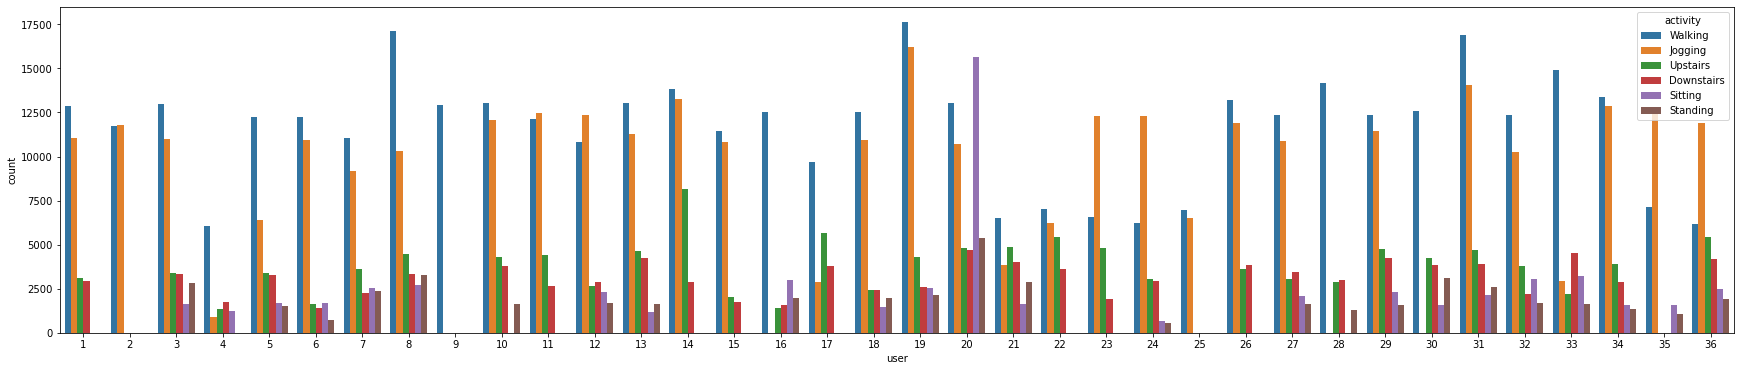

In [47]:
#count of time stamps of each user by activities
plt.figure(figsize = (30, 6))
sns.countplot(x = "user", hue = "activity", data = data)
plt.show()

In [8]:
data.groupby(['activity','user']).size().max()

17622

In [7]:
data.groupby(['activity','user']).size().min()

544

In [49]:
data.groupby('activity').mean()

,user,timestamp,x-axis,y-axis,z-axis
activity,,,,,
Downstairs,19.669554,3.061674e+13,0.472726,8.620225,0.685678
Jogging,18.621525,3.259128e+13,-0.227104,5.632403,-0.155770
Sitting,20.649877,4.581757e+13,1.856270,1.853374,6.559716
Standing,20.032050,5.046624e+13,-1.178269,8.987416,0.580139
Upstairs,19.351433,3.455309e+13,0.382177,8.129476,0.324257
Walking,18.177896,2.929367e+13,1.547719,8.705231,-0.112612


In [46]:
#activities done by which users
tmp=data.groupby('activity')['user'].unique()
for i in tmp.keys():
    print(i,tmp[i])

Downstairs [ 1  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 26 27
 28 29 30 31 32 33 34 36]
Jogging [ 1  2  3  4  5  6  7  8 10 11 12 13 14 15 17 18 19 20 21 22 23 24 25 26
 27 29 31 32 33 34 35 36]
Sitting [ 3  4  5  6  7  8 12 13 16 18 19 20 21 24 27 29 30 31 32 33 34 35 36]
Standing [ 3  5  6  7  8 10 12 13 16 18 19 20 21 24 27 28 29 30 31 32 33 34 35 36]
Upstairs [ 1  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 26 27
 28 29 30 31 32 33 34 36]
Walking [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36]


In [92]:
#check common users in all activities
l=[]
for i in tmp.keys():
    l.append(tmp[i])
from functools import reduce
list(reduce(lambda i, j: i & j, (set(n) for n in l)))#ref:https://www.tutorialspoint.com/find-common-elements-in-list-of-lists-in-python

[3, 5, 6, 7, 8, 12, 13, 18, 19, 20, 21, 24, 27, 29, 31, 32, 33, 34, 36]

In [40]:
#count of users for each activity
data.groupby('activity')['user'].nunique()

activity
Downstairs    32
Jogging       32
Sitting       23
Standing      24
Upstairs      32
Walking       36
Name: user, dtype: int64

In [83]:
#try to reduce timepoints within 500 for plotting
dfdict = {i : pd.DataFrame() for i in range(1,37)}

for key in dfdict.keys():
    dfdict[key] = data[data["user"] == key][:500]

dfdict[2]

,user,activity,timestamp,x-axis,y-axis,z-axis
29978,2,Walking,7981272321000,-0.50,9.72,1.54
29979,2,Walking,7981322339000,0.19,10.31,1.76
29980,2,Walking,7981372327000,0.08,11.60,-0.72
29981,2,Walking,7981422346000,-1.04,13.57,-1.61
29982,2,Walking,7981472333000,-4.86,12.87,0.23
...,...,...,...,...,...,...
30473,2,Walking,8006032331000,-0.46,13.38,2.30
30474,2,Walking,8006082349000,-1.73,12.95,2.34
30475,2,Walking,8006132337000,-4.14,16.02,2.60
30476,2,Walking,8006182325000,-5.41,14.14,-1.80


In [85]:
#try to reduce timepoints within 500 for plotting
result=pd.DataFrame()
for key in dfdict.keys():
    result=pd.concat([result,dfdict[key]])

result

,user,activity,timestamp,x-axis,y-axis,z-axis
0,1,Walking,4991922345000,0.69,10.80,-2.030000
1,1,Walking,4991972333000,6.85,7.44,-0.500000
2,1,Walking,4992022351000,0.93,5.63,-0.500000
3,1,Walking,4992072339000,-2.11,5.01,-0.690000
4,1,Walking,4992122358000,-4.59,4.29,-1.950000
...,...,...,...,...,...,...
1042010,36,Walking,13084092267000,3.11,14.86,-2.220117
1042011,36,Walking,13084142286000,1.54,14.82,-1.076008
1042012,36,Walking,13084192273000,-2.56,10.65,-2.260978
1042013,36,Walking,13084242292000,-0.95,6.05,-0.531194


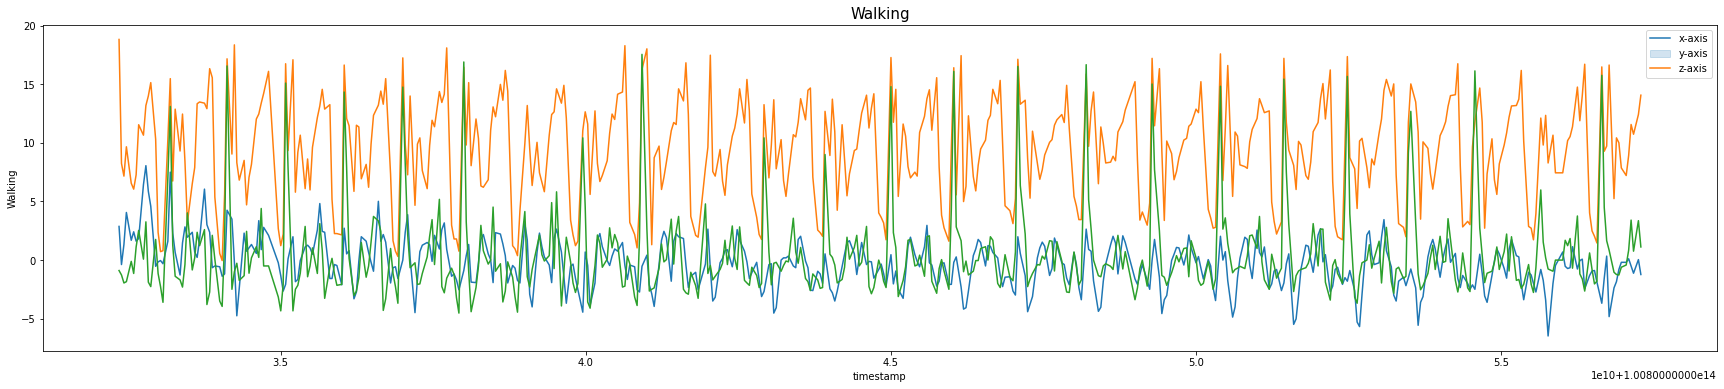

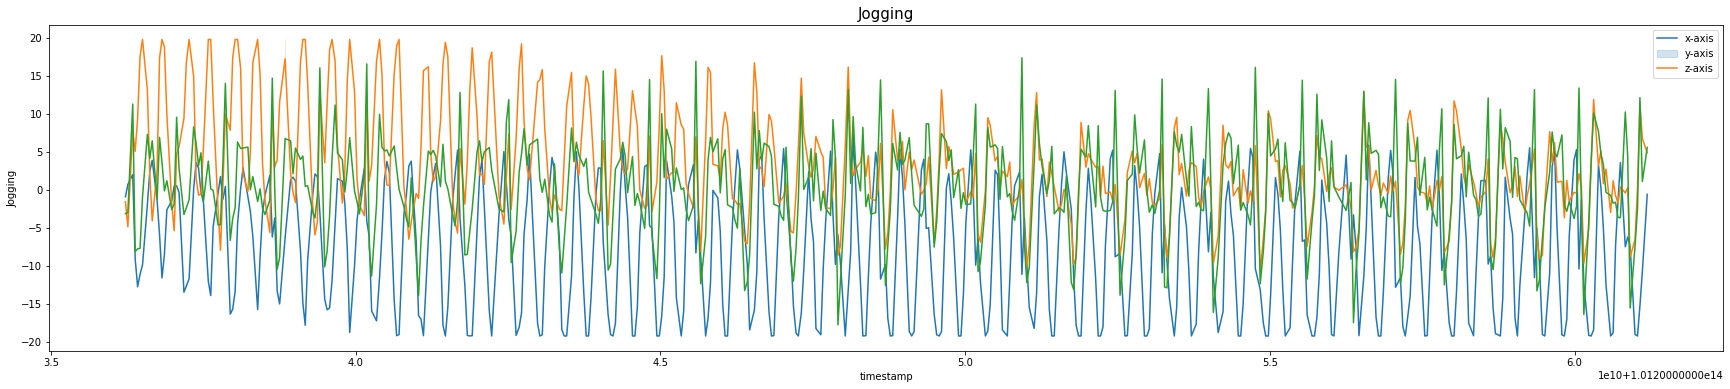

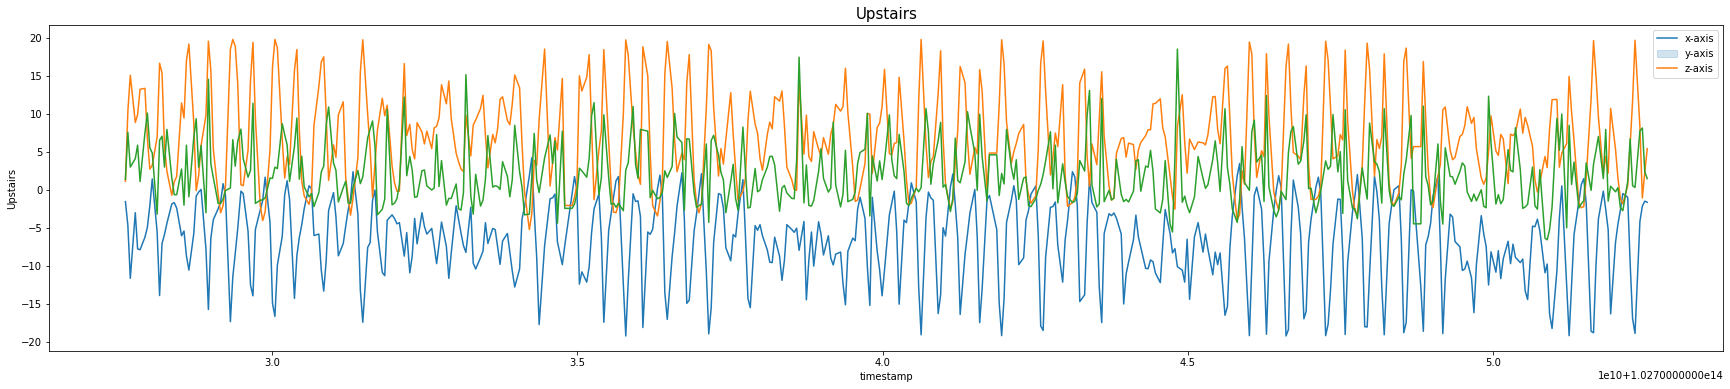

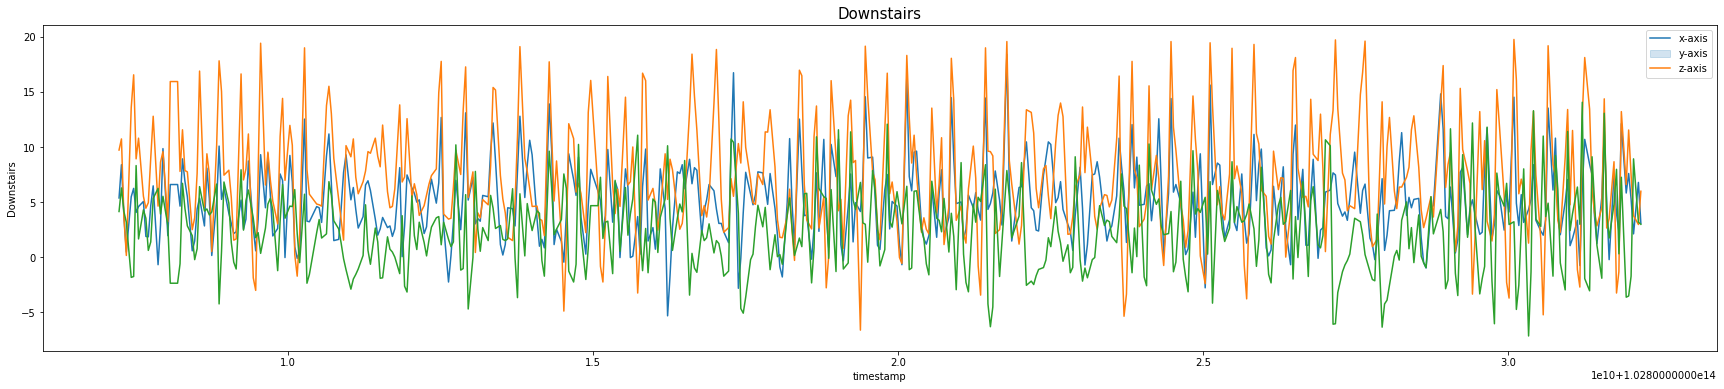

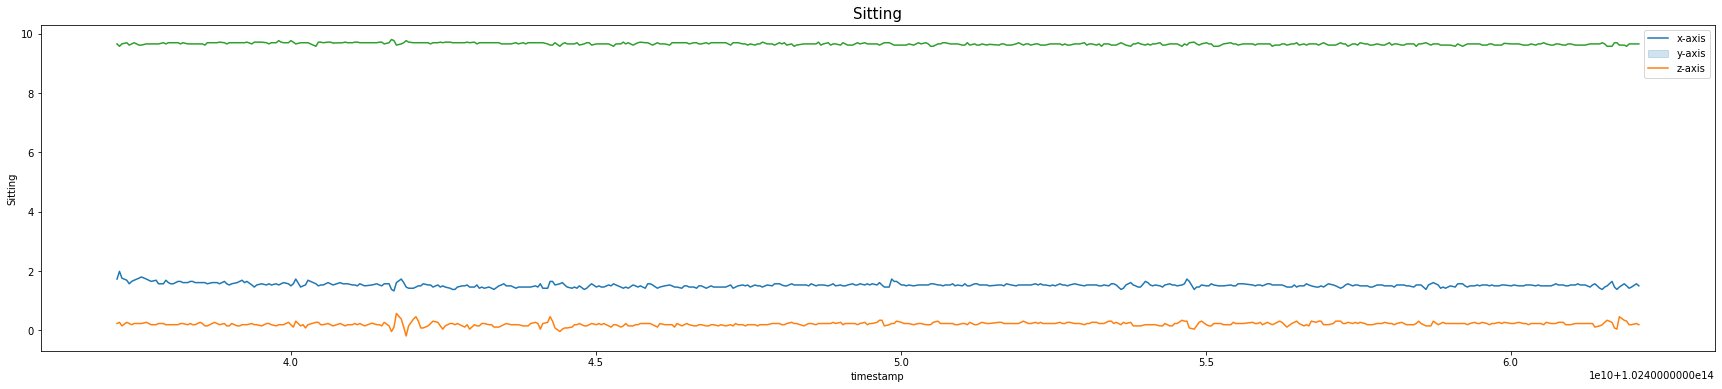

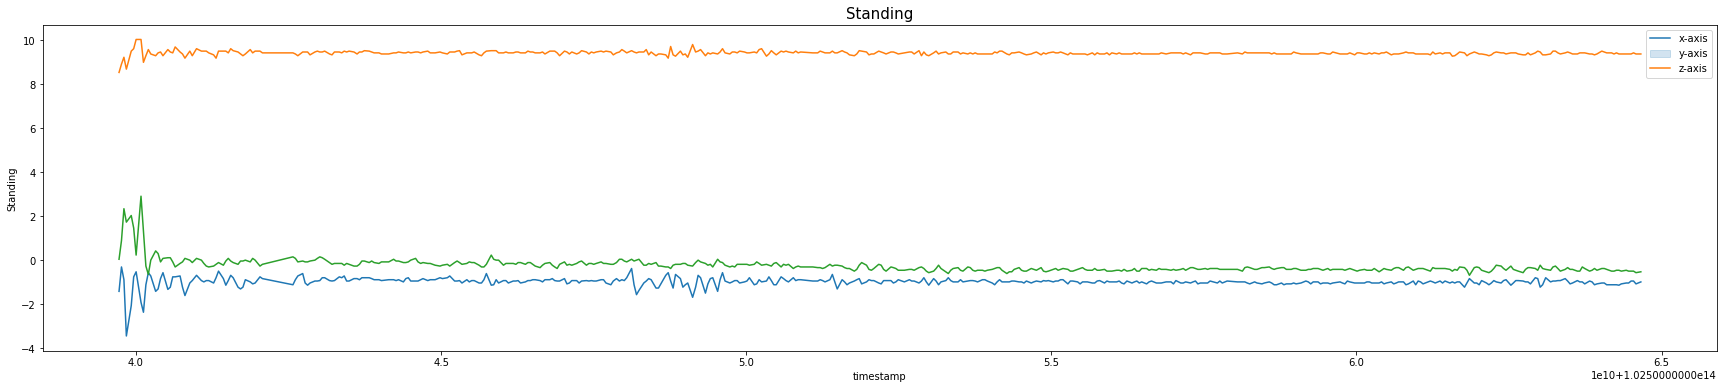

In [96]:
#check stationarity
for i in ["Walking", "Jogging", "Upstairs", "Downstairs", "Sitting", "Standing"]:
  user = data[(data["user"] == 3)&(data["activity"] == i)][:500]
  plt.figure(figsize = (30, 6))
  sns.lineplot(data = user,x = "timestamp",y = "x-axis")
  sns.lineplot(data = user,x = "timestamp",y = "y-axis")
  sns.lineplot(data = user,x = "timestamp",y = "z-axis") 
  plt.legend(["x-axis", "y-axis", "z-axis"])
  plt.ylabel(i)
  plt.title(i, fontsize = 15)
  plt.show()

/Users/weiyushitian/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/weiyushitian/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/weiyushitian/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/weiyushitian/opt/anaconda3/lib/pyth

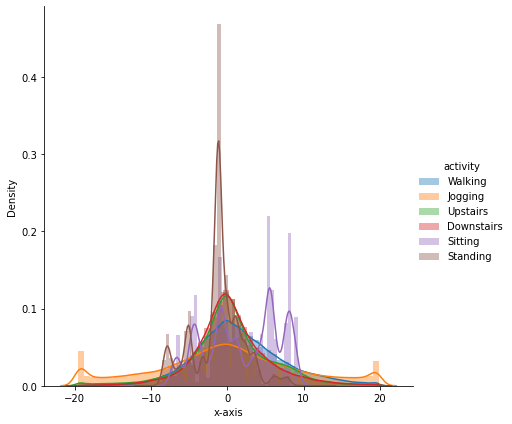

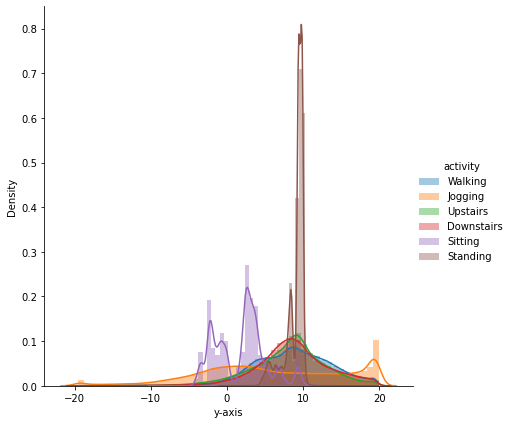

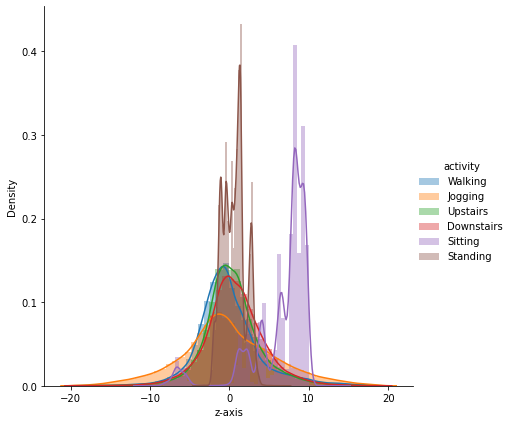

In [98]:
sns.FacetGrid(data, hue = "activity", size = 6).map(sns.distplot, "x-axis").add_legend()
sns.FacetGrid(data, hue = "activity", size = 6).map(sns.distplot, "y-axis").add_legend()
sns.FacetGrid(data, hue = "activity", size = 6).map(sns.distplot, "z-axis").add_legend()

In [101]:
#summary statistics
summary=data.groupby("activity").describe(include="all")
summary["x-axis"]

,count,mean,std,min,25%,50%,75%,max
activity,,,,,,,,
Downstairs,100192.0,0.472726,4.961663,-19.61,-2.18,0.08,2.83,19.95
Jogging,324600.0,-0.227104,9.333826,-19.61,-5.82,-0.23,5.48,19.95
Sitting,59939.0,1.856270,4.759028,-10.31,-1.61,1.53,5.75,12.45
Standing,48393.0,-1.178269,3.235186,-10.99,-2.03,-1.12,0.61,13.10
Upstairs,122598.0,0.382177,5.501313,-19.61,-2.26,0.15,3.11,19.95
Walking,417901.0,1.547719,5.828952,-19.61,-2.18,0.99,4.90,19.91


In [102]:
summary["y-axis"]

,count,mean,std,min,25%,50%,75%,max
activity,,,,,,,,
Downstairs,100192.0,8.620225,4.892873,-19.61,5.98,8.58,11.495573,20.04
Jogging,324600.0,5.632403,9.323852,-19.61,-0.91,5.01,13.630000,20.04
Sitting,59939.0,1.853374,3.257750,-9.30,-0.95,2.49,3.720000,18.47
Standing,48393.0,8.987416,1.264137,-0.65,8.50,9.43,9.810000,19.46
Upstairs,122598.0,8.129476,4.881203,-19.61,5.48,8.58,11.030000,20.04
Walking,417901.0,8.705231,5.016514,-18.85,5.28,8.77,12.180000,20.04


In [103]:
summary["z-axis"]

,count,mean,std,min,25%,50%,75%,max
activity,,,,,,,,
Downstairs,100192.0,0.685678,3.710944,-19.61,-1.457377,0.503953,2.760000,19.34
Jogging,324600.0,-0.155770,5.952950,-19.80,-3.677494,-0.530000,3.450000,19.61
Sitting,59939.0,6.559716,3.735591,-10.80,5.710000,8.117727,8.920000,13.99
Standing,48393.0,0.580139,1.376819,-4.14,-0.500000,0.650000,1.420000,7.25
Upstairs,122598.0,0.324257,3.571793,-19.61,-1.688923,0.081722,2.070293,19.19
Walking,417901.0,-0.112612,4.020887,-19.38,-2.410000,-0.570000,1.650000,19.23
